In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../data/electron.csv")
data = data.rename(columns={"E1": "E1 [GeV]", "E2": "E2 [GeV]", "px1 ": "px1 [GeV]", "px2": "px2 [GeV]", "py1": "py1 [GeV]", "py2": "py2 [GeV]", "pz1": "pz1 [GeV]", "pz2": "pz2 [GeV]", "phi1": "phi1 [rad]", "phi2": "phi2 [rad]", "pt1": "pt1 [GeV]", "pt2": "pt2 [GeV]", "M": "M [GeV]"})
data.head(10)

,Run,Event,E1 [GeV],px1 [GeV],py1 [GeV],pz1 [GeV],pt1 [GeV],eta1,phi1 [rad],Q1,E2 [GeV],px2 [GeV],py2 [GeV],pz2 [GeV],pt2 [GeV],eta2,phi2 [rad],Q2,M [GeV]
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.07780,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,17.14920,-11.713500,5.04474,11.46470,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.420480,2.965600,1,15.82030,-1.472800,2.25895,-15.58880,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.218380,1.007210,1,25.12730,4.087860,2.59641,24.65630,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,13.88710,-0.277757,-2.42560,-13.67080,2.44145,-2.423700,-1.684810,-1,2.74718
5,147115,366663412,6.39616,-5.45672,-2.090680,-2.60078,5.84352,-0.431551,-2.775710,-1,21.38650,15.169800,-8.87030,-12.18930,17.57280,-0.647450,-0.529120,-1,18.40230
6,147115,366639101,84.50580,8.82436,10.578900,83.37530,13.77610,2.500320,0.875576,1,12.67840,-1.134460,-3.20939,-12.21280,3.40400,-1.989560,-1.910570,-1,65.32390
7,147115,367133576,77.00570,10.00290,9.175450,-75.80000,13.57370,-2.421030,0.742282,1,9.11623,-1.722950,-1.48674,-8.82761,2.27574,-2.064940,-2.429650,1,11.29120
8,147115,368639137,9.68787,1.11192,2.050640,-9.40284,2.33270,-2.102180,1.073940,1,63.45970,-1.858440,12.79460,-62.12870,12.92890,-2.273550,1.715040,1,3.58678
9,147115,367825395,27.88120,11.93900,-18.346200,17.26960,21.88880,0.724032,-0.993887,1,12.92180,-5.026300,11.60260,2.66263,12.64450,0.209050,1.979600,-1,34.26850


## Data Description
- Run: The run number of the event.
- Event: The event number.
- E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.
- px1,py1,pz1,px2,py2,pz2: The components of the momentum of the electron 1 and 2 (GeV).
- pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).
- eta1, eta2: The pseudorapidity of the electron 1 and 2.
- phi1, phi2: The phi angle of the electron 1 and 2 (rad).
- Q1, Q2: The charge of the electron 1 and 2.
- M: The invariant mass of two electrons (GeV).


## Transverse momentum

A transverse momentum is the sum of the momentum components that are in the planes which are normal to direction of movement of the electron.
The electrons are moving alongside the z-axis, so the transverse momentum is the sum of the x and y vector components. The following code reproduces the same values for the transverse momentum of the two electrons that are in initial data.

In [4]:
# Select one random row

shuffled_data = data.sample(frac=1)
event_1 = shuffled_data.sample(frac=1/data.shape[0])
event_1

,Run,Event,E1 [GeV],px1 [GeV],py1 [GeV],pz1 [GeV],pt1 [GeV],eta1,phi1 [rad],Q1,E2 [GeV],px2 [GeV],py2 [GeV],pz2 [GeV],pt2 [GeV],eta2,phi2 [rad],Q2,M [GeV]
83666,147926,218760669,57.605,-3.95115,16.3796,-55.0857,16.8494,-1.90033,1.8075,1,36.3202,0.486633,-14.1181,33.4604,14.1265,1.59731,-1.53634,-1,91.3081


In [5]:
# Function for calculating momentum
def calc_mom(Px , Py, *args, **kwargs):
    Pz = kwargs.get("Pz")
    return np.sqrt(Px ** 2 + Py ** 2 + Pz ** 2)

In [6]:
px1 = event_1["px1 [GeV]"].to_numpy()
py1 = event_1["py1 [GeV]"].to_numpy()
pz1 = event_1["pz1 [GeV]"].to_numpy()
px2 = event_1["px2 [GeV]"].to_numpy()
py2 = event_1["py2 [GeV]"].to_numpy()
pz2 = event_1["pz2 [GeV]"].to_numpy()

tr_momentum1 = calc_mom(px1[0], py1[0], Pz=0).round(5)
tr_momentum2 = calc_mom(px2[0], py2[0], Pz=0).round(5)
print(f"The transverse momentum of the Electron 1 is {tr_momentum1} GeV, while for Electron 2 we have {tr_momentum2} GeV.")

The transverse momentum of the Electron 1 is 16.84942 GeV, while for Electron 2 we have 14.12648 GeV.


### Histograms

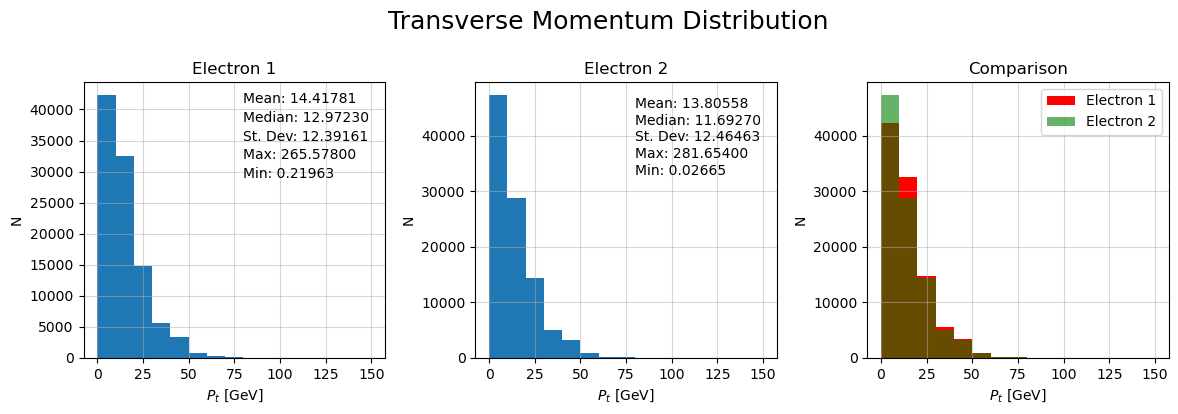

In [7]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, 
                                      ncols=3,
                                       figsize=(14,4))

mean_1 = data["pt1 [GeV]"].mean()
median_1 = data["pt1 [GeV]"].median()
std_1 = data["pt1 [GeV]"].std()
max_1 = data["pt1 [GeV]"].max()
min_1 = data["pt1 [GeV]"].min()

mean_2 = data["pt2 [GeV]"].mean()
median_2 = data["pt2 [GeV]"].median()
std_2 = data["pt2 [GeV]"].std()
max_2 = data["pt2 [GeV]"].max()
min_2 = data["pt2 [GeV]"].min()

ax1.hist(data["pt1 [GeV]"], bins=15, range=(0, 150));
ax2.hist(data["pt2 [GeV]"], bins=15, range=(0, 150));
ax3.hist(data["pt1 [GeV]"], color="r", label="Electron 1", bins=15, range=(0, 150));
ax3.hist(data["pt2 [GeV]"], color="g", alpha=0.6, label="Electron 2", bins=15, range=(0, 150))

ax1.text(x=80, y=41000, s=f"Mean: {mean_1:.5f}")
ax1.text(x=80, y=38000, s=f"Median: {median_1:.5f}")
ax1.text(x=80, y=35000, s=f"St. Dev: {std_1:.5f}")
ax1.text(x=80, y=32000, s=f"Max: {max_1:.5f}")
ax1.text(x=80, y=29000, s=f"Min: {min_1:.5f}")

ax2.text(x=80, y=45000, s=f"Mean: {mean_2:.5f}")
ax2.text(x=80, y=42000, s=f"Median: {median_2:.5f}")
ax2.text(x=80, y=39000, s=f"St. Dev: {std_2:.5f}")
ax2.text(x=80, y=36000, s=f"Max: {max_2:.5f}")
ax2.text(x=80, y=33000, s=f"Min: {min_2:.5f}")

fig.suptitle("Transverse Momentum Distribution", fontsize=18)
ax1.set(title="Electron 1", xlabel="$P_{t}$ [GeV]", ylabel="N")
ax2.set(title="Electron 2", xlabel="$P_{t}$ [GeV]", ylabel="N")
ax3.set(title="Comparison", xlabel="$P_{t}$ [GeV]", ylabel="N")
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax3.grid(alpha=0.5)

plt.legend()
plt.subplots_adjust(top=0.8, wspace=0.3, hspace=0.3)
plt.savefig("../plots/Tranverse_Momentum_Distribution.png", format="png")
plt.show()

Both electrons have similar distributions of their transverse momentums, but Electron 2 tends to have lower transverse momentum than Electron 1.

1) There is higher number of events where Electron 2 has p$_{t}$ in the range 0 - 10 GeV.
2) There is less number of events where Electron 2 has p$_{t}$ in the range 10 - 20 GeV.
3) The frequency difference is much less apparent in the upper ranges.

## Exact numbers

In [8]:
ran_11 = len(data[data["pt1 [GeV]"] <= 10])
ran_12 = len(data[(data["pt1 [GeV]"] > 10) & (data["pt1 [GeV]"] <= 20)])
ran_13 = len(data[(data["pt1 [GeV]"] > 20) & (data["pt1 [GeV]"] <= 30)])
ran_14 = len(data[(data["pt1 [GeV]"] > 30) & (data["pt1 [GeV]"] <= 40)])
ran_15 = len(data[(data["pt1 [GeV]"] > 40) & (data["pt1 [GeV]"] <= 50)])
ran_16 = len(data[(data["pt1 [GeV]"] > 50) & (data["pt1 [GeV]"] <= 75)])
ran_17 = len(data[(data["pt1 [GeV]"] > 75) & (data["pt1 [GeV]"] <= 100)])
ran_18 = len(data[(data["pt1 [GeV]"] > 100) & (data["pt1 [GeV]"] <= 300)])

ran_21 = len(data[data["pt2 [GeV]"] <= 10])
ran_22 = len(data[(data["pt2 [GeV]"] > 10) & (data["pt2 [GeV]"] <= 20)])
ran_23 = len(data[(data["pt2 [GeV]"] > 20) & (data["pt2 [GeV]"] <= 30)])
ran_24 = len(data[(data["pt2 [GeV]"] > 30) & (data["pt2 [GeV]"] <= 40)])
ran_25 = len(data[(data["pt2 [GeV]"] > 40) & (data["pt2 [GeV]"] <= 50)])
ran_26 = len(data[(data["pt2 [GeV]"] > 50) & (data["pt2 [GeV]"] <= 75)])
ran_27 = len(data[(data["pt2 [GeV]"] > 75) & (data["pt2 [GeV]"] <= 100)])
ran_28 = len(data[(data["pt2 [GeV]"] > 100) & (data["pt2 [GeV]"] <= 300)])

tm_frequency = pd.DataFrame({"": ["p_t1", "p_t2"],
                             "0 - 10": [ran_11, ran_21],
                             "10 - 20": [ran_12, ran_22],
                             "20 - 30": [ran_13, ran_23],
                             "30 - 40": [ran_14, ran_24],
                             "40 - 50": [ran_15, ran_25],
                             "50 - 75": [ran_16, ran_26],
                             "75 - 100": [ran_17, ran_27],
                             "> 100": [ran_18, ran_28],})
tm_frequency

,,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 75,75 - 100,> 100
0,p_t1,42317,32531,14806,5584,3337,1118,137,61
1,p_t2,47304,28700,14345,5004,3165,1135,170,68


## Pie Charts

In [9]:
tm_frequency.dtypes

            object
0 - 10       int64
10 - 20      int64
20 - 30      int64
30 - 40      int64
40 - 50      int64
50 - 75      int64
75 - 100     int64
> 100        int64
dtype: object

In [10]:
print(tm_frequency.iloc[0].iloc[1:]) # Selects first row as a Series and drops first column value

0 - 10      42317
10 - 20     32531
20 - 30     14806
30 - 40      5584
40 - 50      3337
50 - 75      1118
75 - 100      137
> 100          61
Name: 0, dtype: object


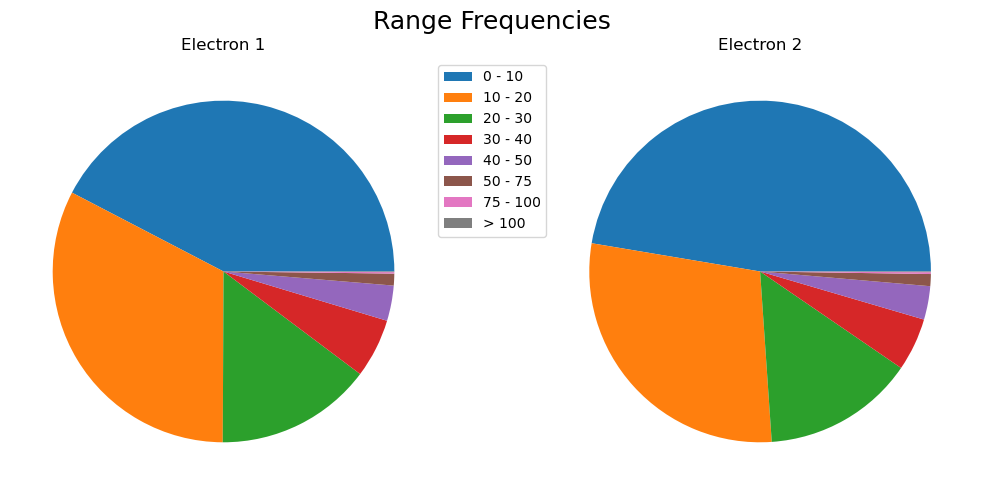

In [11]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.pie(tm_frequency.iloc[0].iloc[1:])
ax2.pie(tm_frequency.iloc[1].iloc[1:])

fig.suptitle("Range Frequencies", fontsize=18)
ax1.set(title="Electron 1")
ax2.set(title="Electron 2")

plt.legend(labels=tm_frequency.columns[1:], loc="upper left", bbox_to_anchor=(-0.27,1))
plt.tight_layout()
plt.show()

## Scatter plot

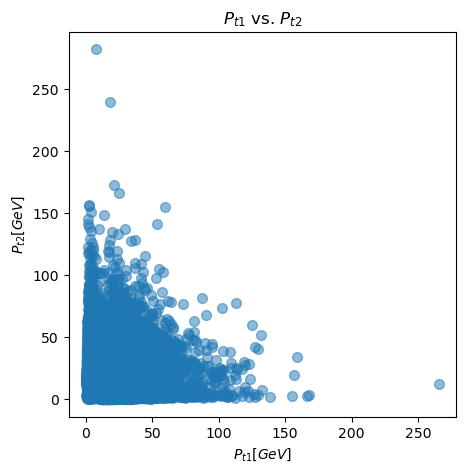

In [35]:
pt_1 = data["pt1 [GeV]"]
pt_2 = data["pt2 [GeV]"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(pt_1, pt_2, s=50, alpha=0.5)
ax.set(title="$P_{t1}$ vs. $P_{t2}$", xlabel="$P_{t1} [GeV]$", ylabel="$P_{t2} [GeV]$")

plt.show()

The scatter plot reveals two features.
1. There is a visible anti-correlation between the transverse momenta of the two electrons — when one electron has a high $p_{t}$​, the other tends to have a lower $p_{t}$. This pattern is consistent with momentum conservation in two-body decays or collision processes.
2. Most electron pairs are clustered in the bottom-left corner of the plot, indicating that both electrons typically have low transverse momentum. This suggests that the dataset is dominated by lower-energy events.